<a href="https://colab.research.google.com/github/MINAKSHI101/CssNew/blob/master/sleeping%20disorder.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
import joblib
from sklearn.model_selection import GridSearchCV
import warnings
warnings.filterwarnings('ignore')


In [4]:
df = pd.read_csv('/content/Sleep_health_and_lifestyle_dataset.csv')
df.head()

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
0,1,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,None
1,2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,None
2,3,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,None
3,4,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
4,5,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea


In [5]:
row,col = df.shape
print(f"Dataset contain {row} rows and {col} columns")

Dataset contain 374 rows and 13 columns


In [6]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 374 entries, 0 to 373
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Person ID                374 non-null    int64  
 1   Gender                   374 non-null    object 
 2   Age                      374 non-null    int64  
 3   Occupation               374 non-null    object 
 4   Sleep Duration           374 non-null    float64
 5   Quality of Sleep         374 non-null    int64  
 6   Physical Activity Level  374 non-null    int64  
 7   Stress Level             374 non-null    int64  
 8   BMI Category             374 non-null    object 
 9   Blood Pressure           374 non-null    object 
 10  Heart Rate               374 non-null    int64  
 11  Daily Steps              374 non-null    int64  
 12  Sleep Disorder           374 non-null    object 
dtypes: float64(1), int64(7), object(5)
memory usage: 38.1+ KB


In [7]:
df.describe(include='object')

,Gender,Occupation,BMI Category,Blood Pressure,Sleep Disorder
count,374,374,374,374,374
unique,2,11,4,25,3
top,Male,Nurse,Normal,130/85,None
freq,189,73,195,99,219


In [8]:
print("Number of duplicate values: ",df.duplicated().sum())

Number of duplicate values:  0


In [9]:
print("Number of Null values: ",df.isna().sum())

Number of Null values:  Person ID                  0
Gender                     0
Age                        0
Occupation                 0
Sleep Duration             0
Quality of Sleep           0
Physical Activity Level    0
Stress Level               0
BMI Category               0
Blood Pressure             0
Heart Rate                 0
Daily Steps                0
Sleep Disorder             0
dtype: int64


In [ ]:
df.drop('Person ID',inplace=True,axis=1)

In [12]:
df.head()

,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
0,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,None
1,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,None
2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,None
3,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
4,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea


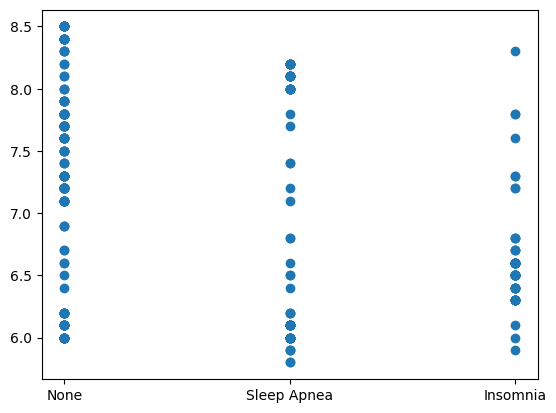

In [14]:
plt.scatter(df['Sleep Disorder'],df['Sleep Duration'])

<BarContainer object of 374 artists>

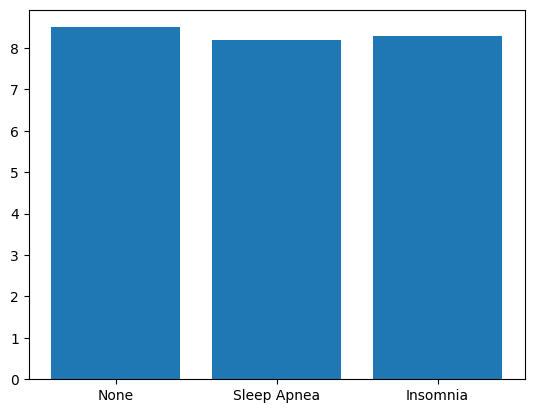

In [15]:
plt.bar(df['Sleep Disorder'],df['Sleep Duration'])

In [16]:
data = df[df['Sleep Disorder']=='None']
avg_sleeptime = data['Sleep Duration'].mean()
avg_sleeptime

7.358447488584476

<Axes: xlabel='Sleep Disorder', ylabel='Physical Activity Level'>

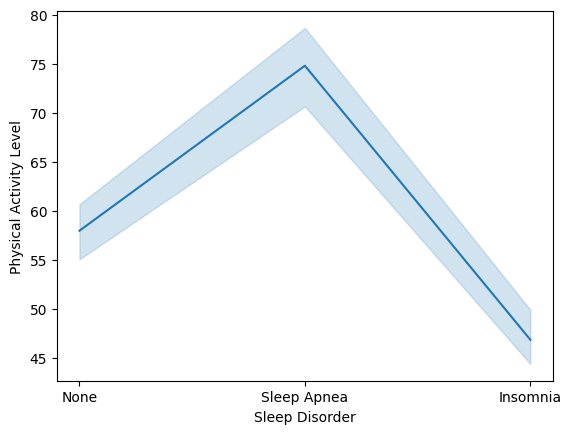

In [17]:
sns.lineplot(x='Sleep Disorder',y='Physical Activity Level',data=df)

In [18]:
data = df[df['Sleep Disorder']=='None']
pal_time = data['Physical Activity Level'].mode()
pal_time

0    60
Name: Physical Activity Level, dtype: int64

In [19]:
cat_col = []
for col in df.columns:
    if df[col].dtype == 'object':
        cat_col.append(col)
print(cat_col)

['Gender', 'Occupation', 'BMI Category', 'Blood Pressure', 'Sleep Disorder']


In [20]:
le = LabelEncoder()
for col in cat_col:
    df[col] = le.fit_transform(df[col])

In [21]:
df.head()

,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
0,1,27,9,6.1,6,42,6,3,11,77,4200,1
1,1,28,1,6.2,6,60,8,0,9,75,10000,1
2,1,28,1,6.2,6,60,8,0,9,75,10000,1
3,1,28,6,5.9,4,30,8,2,22,85,3000,2
4,1,28,6,5.9,4,30,8,2,22,85,3000,2


In [22]:
x = df.drop('Sleep Disorder',axis=1)
y = df['Sleep Disorder']

In [23]:
x_train,x_test,y_train,y_test = train_test_split(x,y,shuffle = True,random_state=42,test_size=0.15)

In [24]:
models = {
    'Logistic Regression':LogisticRegression(),
    'RandomForestClassifier': RandomForestClassifier(),
    'DecisionTreeClassifer':DecisionTreeClassifier(),
    'SVM':SVC()
}

In [25]:
for i in range(len(models)):
    model = list(models.values())[i]
    model.fit(x_train,y_train)

    train_preds = model.predict(x_train)
    test_preds = model.predict(x_test)

    model_name = list(models.keys())[i]
    print(model_name)
    print("Training dataset accuracy: ")
    print("Accuracy : ",accuracy_score(y_train,train_preds))
    print()
    print("Testing dataset accuracy: ")
    print("Accuracy : ",accuracy_score(y_test,test_preds))
    print()
    print('-------------------------------------------------')

Logistic Regression
Training dataset accuracy: 
Accuracy :  0.8801261829652997

Testing dataset accuracy: 
Accuracy :  0.8771929824561403

-------------------------------------------------
RandomForestClassifier
Training dataset accuracy: 
Accuracy :  0.9337539432176656

Testing dataset accuracy: 
Accuracy :  0.8596491228070176

-------------------------------------------------
DecisionTreeClassifer
Training dataset accuracy: 
Accuracy :  0.9337539432176656

Testing dataset accuracy: 
Accuracy :  0.8947368421052632

-------------------------------------------------
SVM
Training dataset accuracy: 
Accuracy :  0.6466876971608833

Testing dataset accuracy: 
Accuracy :  0.6666666666666666

-------------------------------------------------
